Punto a


In [ ]:
"""
Brute-force: listar todas las posiciones con energía mínima y mostrar
la grilla para cada mínimo, además de una grilla combinada marcando
todas las posiciones minimizadoras.
"""

import math
from itertools import combinations

# Parámetros del potencial de Morse (D0, alpha, r0)
MORSE_PARAMS = {
    ('Fe', 'Fe'): (0.7640, 1.5995, 2.7361),
    ('Fe', 'R'):  (0.6036, 1.6458, 3.1880),
    ('R',  'R'):  (0.3120, 0.9450, 4.0920),
    ('Fe', 'Ti'): (0.8162, 1.4480, 2.9140),
    ('R',  'Ti'): (0.4964, 1.4401, 3.4309),
    ('Ti', 'Ti'): (0.6540, 1.2118, 3.3476),
}

def get_params(a, b):
    key = tuple(sorted((a, b)))
    return MORSE_PARAMS[key]

def morse_potential(r, D0, alpha, r0):
    if r <= 0:
        return 0.0
    return D0 * (math.exp(-2*alpha*(r - r0)) - 2*math.exp(-alpha*(r - r0)))

def total_energy(atom_list, lattice_spacing=1.0):
    E = 0.0
    for (i, (el_i, pos_i)), (j, (el_j, pos_j)) in combinations(enumerate(atom_list), 2):
        dx = (pos_i[0] - pos_j[0]) * lattice_spacing
        dy = (pos_i[1] - pos_j[1]) * lattice_spacing
        r = math.hypot(dx, dy)
        D0, alpha, r0 = get_params(el_i, el_j)
        E += morse_potential(r, D0, alpha, r0)
    return E

def build_4x4_grid_center_R():
    """
    Construye la configuración 4x4 con R en el centro 2x2:
    centro = {(1,1),(2,1),(1,2),(2,2)} -> R
    resto -> Fe
    Devuelve atom_list y lista de índices de los sitios Fe (candidatos).
    """
    atom_list = []
    fe_indices = []
    center_positions = {(1,1), (2,1), (1,2), (2,2)}
    for y in range(4):
        for x in range(4):
            if (x, y) in center_positions:
                atom_list.append(('R', (x, y)))
            else:
                fe_indices.append(len(atom_list))
                atom_list.append(('Fe', (x, y)))
    return atom_list, fe_indices

def make_grid_strings(atom_list):
    """
    Devuelve una matriz 4x4 de strings con 'Fe','R' o 'Ti' según atom_list.
    Nota: origen (0,0) corresponde a x=0,y=0 (abajo-izq).
    """
    grid = [['' for _ in range(4)] for __ in range(4)]
    for el, (x, y) in atom_list:
        grid[y][x] = el
    return grid

def print_grid_from_strings(grid, title=None):
    if title:
        print(title)
    for y in reversed(range(4)):
        row = "  ".join(f"{grid[y][x]:>3}" for x in range(4))
        print(f"y={y}  {row}")
    print("     x=0   x=1   x=2   x=3\n")

def brute_force_all_minima(lattice_spacing=2.8, rel_tol=1e-9, abs_tol=1e-12):
    base_atoms, fe_indices = build_4x4_grid_center_R()

    results = []  # (idx, pos, energy, atoms_with_Ti)
    for idx in fe_indices:
        atoms = [(el, pos) for (el, pos) in base_atoms]
        _, pos = atoms[idx]
        atoms[idx] = ('Ti', pos)
        E = total_energy(atoms, lattice_spacing)
        results.append((idx, pos, E, atoms))

    # encontrar energía mínima
    energies = [r[2] for r in results]
    minE = min(energies)

    # recoger todas las configuraciones con energía ≈ minE
    minima = [r for r in results if math.isclose(r[2], minE, rel_tol=rel_tol, abs_tol=abs_tol)]

    # imprimir todos los resultados resumidos
    print("Resultados fuerza bruta (resumen):")
    for idx, pos, E, _ in results:
        print(f"  Sustitución en {pos} -> E = {E:.6f}")
    print()
    print(f"Energía mínima encontrada: {minE:.6f}")
    print(f"Número de posiciones con energía mínima (tolerancia usada): {len(minima)}")
    print("Posiciones mínimas (coordenadas):", [pos for (_, pos, _, _) in minima])
    print()

    # imprimir la grilla para cada mínimo (cada una con un único Ti)
    for n, (idx, pos, E, atoms) in enumerate(minima, start=1):
        title = f"Grilla mínima #{n} - Ti en {pos}  E = {E:.6f}"
        grid = make_grid_strings(atoms)
        print_grid_from_strings(grid, title=title)

    # imprimir una grilla combinada que marca todas las posiciones minimizadoras con ' M '
    combined_grid = make_grid_strings(base_atoms)  # copia inicial sin Ti
    for (_, pos, _, _) in minima:
        x, y = pos
        # marcar con ' M ' para indicar "sitio minimizador"
        combined_grid[y][x] = ' Ti '
    print_grid_from_strings(combined_grid, title="Grilla combinada")

    return minima, minE

if __name__ == "__main__":
    minima, minE = brute_force_all_minima()


Resultados fuerza bruta (resumen):
  Sustitución en (0, 0) -> E = -9.744382
  Sustitución en (1, 0) -> E = -9.157522
  Sustitución en (2, 0) -> E = -9.157522
  Sustitución en (3, 0) -> E = -9.744382
  Sustitución en (0, 1) -> E = -9.157522
  Sustitución en (3, 1) -> E = -9.157522
  Sustitución en (0, 2) -> E = -9.157522
  Sustitución en (3, 2) -> E = -9.157522
  Sustitución en (0, 3) -> E = -9.744382
  Sustitución en (1, 3) -> E = -9.157522
  Sustitución en (2, 3) -> E = -9.157522
  Sustitución en (3, 3) -> E = -9.744382

Energía mínima encontrada: -9.744382
Número de posiciones con energía mínima (tolerancia usada): 4
Posiciones mínimas (coordenadas): [(0, 0), (3, 0), (0, 3), (3, 3)]

Grilla mínima #1 - Ti en (0, 0)  E = -9.744382
y=3   Fe   Fe   Fe   Fe
y=2   Fe    R    R   Fe
y=1   Fe    R    R   Fe
y=0   Ti   Fe   Fe   Fe
     x=0   x=1   x=2   x=3

Grilla mínima #2 - Ti en (3, 0)  E = -9.744382
y=3   Fe   Fe   Fe   Fe
y=2   Fe    R    R   Fe
y=1   Fe    R    R   Fe
y=0   Fe   Fe  

Punto b


  TAREA 2: RECOCIDO SIMULADO PARA OPTIMIZACIÓN DE DOPAJE CON Ti
  Red 2D 4x4 - Espaciado: 2.8

Configuración:
  - R (Neodimio) en: [(1, 1), (1, 2), (2, 1), (2, 2)]
  - 12 sitios de Fe disponibles para sustitución

----------------------------------------------------------------------
PARTE 1: Corrida individual detallada (Esquema Exponencial)
----------------------------------------------------------------------
  T=4.7500, E_actual=-9.1575, E_mejor=-9.7444, aceptación=96.7%
  T=1.7028, E_actual=-9.7444, E_mejor=-9.7444, aceptación=80.0%
  T=0.6104, E_actual=-9.7444, E_mejor=-9.7444, aceptación=73.3%
  T=0.2188, E_actual=-9.7444, E_mejor=-9.7444, aceptación=10.0%
  T=0.0784, E_actual=-9.7444, E_mejor=-9.7444, aceptación=0.0%
  T=0.0281, E_actual=-9.7444, E_mejor=-9.7444, aceptación=0.0%
  T=0.0101, E_actual=-9.7444, E_mejor=-9.7444, aceptación=0.0%
  T=0.0036, E_actual=-9.7444, E_mejor=-9.7444, aceptación=0.0%
  T=0.0013, E_actual=-9.7444, E_mejor=-9.7444, aceptación=0.0%

Resultado: 

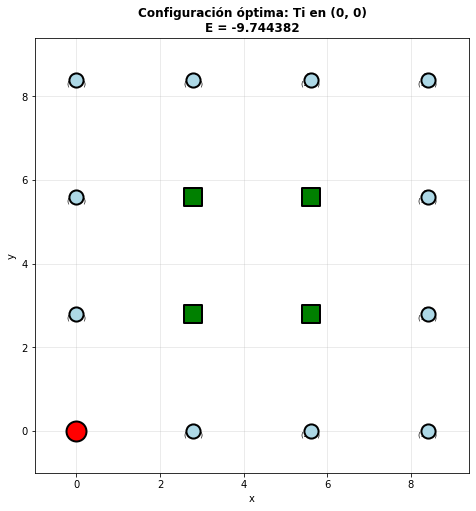


  COMPLETADO


In [21]:
"""
Tarea 2: Recocido Simulado para optimización de dopaje con Titanio
Red 2D 4x4 con átomos de Neodimio (R) y Hierro (Fe)
Distancia entre átomos vecinos: 2.8

CORRECCIONES REALIZADAS:
1. Movimientos solo a vecinos (físicamente realista)
2. Múltiples esquemas de enfriamiento (exponencial, lineal, logarítmico)
3. Retorna el MEJOR estado encontrado (no el final)
4. Sin análisis exhaustivo - solo SA puro
5. Verificación de convergencia mediante múltiples corridas
"""

import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

# =============================================================================
# PARÁMETROS DEL POTENCIAL DE MORSE
# =============================================================================
MORSE_PARAMS = {
    ('Fe', 'Fe'): {'D0': 0.764, 'alpha': 1.5995, 'r0': 2.7361},
    ('Fe', 'R'):  {'D0': 0.6036, 'alpha': 1.6458, 'r0': 3.188},
    ('R', 'R'):   {'D0': 0.312, 'alpha': 0.945, 'r0': 4.092},
    ('Fe', 'Ti'): {'D0': 0.8162, 'alpha': 1.448, 'r0': 2.914},
    ('R', 'Ti'):  {'D0': 0.4964, 'alpha': 1.4401, 'r0': 3.4309},
    ('Ti', 'Ti'): {'D0': 0.6540, 'alpha': 1.2118, 'r0': 3.3476},
}

LATTICE_SPACING = 2.8


def get_morse_params(atom1, atom2):
    key = (atom1, atom2) if (atom1, atom2) in MORSE_PARAMS else (atom2, atom1)
    return MORSE_PARAMS[key]


def morse_potential(r, D0, alpha, r0):
    """Potencial de Morse: U(r) = D0 * [exp(-2α(r-r0)) - 2*exp(-α(r-r0))]"""
    x = r - r0
    exp_term = np.exp(-alpha * x)
    return D0 * (exp_term**2 - 2 * exp_term)


def create_2d_lattice(r_positions=None):
    """
    Crea la red 2D 4x4.
    r_positions: conjunto de tuplas (x,y) donde están los átomos R
    Por defecto: R en las esquinas según la Figura 1 del documento
    """
    if r_positions is None:
        r_positions = {(1, 1), (1, 2), (2, 1), (2, 2)}
    
    positions = []
    atom_types = []
    grid_coords = []
    
    for y in range(4):
        for x in range(4):
            positions.append([x * LATTICE_SPACING, y * LATTICE_SPACING])
            grid_coords.append((x, y))
            atom_types.append('R' if (x, y) in r_positions else 'Fe')
    
    return np.array(positions, dtype=float), atom_types, grid_coords


def precompute_distances(positions):
    """Precalcula matriz de distancias para eficiencia."""
    n = len(positions)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            d = np.linalg.norm(positions[i] - positions[j])
            dist_matrix[i, j] = d
            dist_matrix[j, i] = d
    return dist_matrix


def calculate_energy(dist_matrix, atom_types):
    """Calcula E_total = Σ_i Σ_{j>i} U_ij(r_ij)"""
    n = len(atom_types)
    total = 0.0
    for i in range(n):
        for j in range(i + 1, n):
            r = dist_matrix[i, j]
            p = get_morse_params(atom_types[i], atom_types[j])
            total += morse_potential(r, p['D0'], p['alpha'], p['r0'])
    return total


def get_fe_indices(atom_types):
    """Retorna índices de átomos Fe (candidatos para sustitución)."""
    return [i for i, atom in enumerate(atom_types) if atom == 'Fe']


def get_neighbors(grid_coord, grid_size=4):
    """
    Retorna los vecinos de una posición en la grilla.
    Solo vecinos ortogonales (arriba, abajo, izquierda, derecha).
    """
    x, y = grid_coord
    neighbors = []
    
    # Vecinos ortogonales
    for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < grid_size and 0 <= ny < grid_size:
            neighbors.append((nx, ny))
    
    return neighbors


def substitute_ti(atom_types, fe_index):
    """Crea copia con Ti en posición fe_index."""
    new_types = atom_types.copy()
    new_types[fe_index] = 'Ti'
    return new_types


# =============================================================================
# RECOCIDO SIMULADO - IMPLEMENTACIÓN CORRECTA
# =============================================================================
def simulated_annealing(dist_matrix, atom_types, grid_coords,
                        T_initial=5.0, T_final=0.001,
                        cooling_rate=0.95, steps_per_temp=50,
                        cooling_schedule='exponential',
                        neighbor_only=True,
                        verbose=False):
    """
    Algoritmo de Recocido Simulado.
    
    Args:
        dist_matrix: Matriz de distancias precalculada
        atom_types: Lista de tipos de átomos
        grid_coords: Coordenadas de grilla para cada átomo
        T_initial: Temperatura inicial
        T_final: Temperatura final (criterio de parada)
        cooling_rate: Factor de enfriamiento
        steps_per_temp: Pasos de Monte Carlo por temperatura
        cooling_schedule: 'exponential', 'linear', o 'logarithmic'
        neighbor_only: Si True, solo permite movimientos a vecinos (realista)
        verbose: Si True, imprime progreso
    
    Returns:
        best_idx: Mejor posición encontrada para Ti
        best_energy: Mejor energía encontrada
        energy_history: Historia de energías
        temp_history: Historia de temperaturas
    """
    fe_indices = get_fe_indices(atom_types)
    
    # Crear mapeo de índice a coordenada de grilla y viceversa
    idx_to_grid = {i: grid_coords[i] for i in fe_indices}
    grid_to_idx = {grid_coords[i]: i for i in fe_indices}
    
    # Estado inicial aleatorio
    current_idx = random.choice(fe_indices)
    current_types = substitute_ti(atom_types, current_idx)
    current_energy = calculate_energy(dist_matrix, current_types)
    
    # Mejor solución encontrada (esto es lo que retornamos)
    best_idx = current_idx
    best_energy = current_energy
    
    # Historiales para análisis
    energy_history = [current_energy]
    temp_history = [T_initial]
    
    T = T_initial
    iteration = 0
    max_iterations = 200  # Límite para esquema logarítmico
    
    # Calcular número de iteraciones para esquema lineal
    if cooling_schedule == 'linear':
        # Estimar número de pasos de temperatura
        n_temp_steps = int(np.ceil(np.log(T_final / T_initial) / np.log(cooling_rate)))
        delta_T = (T_initial - T_final) / max(n_temp_steps, 1)
    
    while T > T_final and iteration < max_iterations:
        accepted = 0
        
        for _ in range(steps_per_temp):
            # PROPONER NUEVO ESTADO
            if neighbor_only:
                # Movimiento realista: solo a sitios Fe vecinos
                current_grid = idx_to_grid[current_idx]
                neighbor_grids = get_neighbors(current_grid)
                
                # Filtrar solo vecinos que son Fe (no R)
                fe_neighbor_grids = [g for g in neighbor_grids if g in grid_to_idx]
                
                if not fe_neighbor_grids:
                    # Si no hay vecinos Fe, permitir salto (caso raro)
                    proposed_idx = random.choice([i for i in fe_indices if i != current_idx])
                else:
                    proposed_grid = random.choice(fe_neighbor_grids)
                    proposed_idx = grid_to_idx[proposed_grid]
            else:
                # Movimiento no realista: cualquier sitio Fe
                proposed_idx = random.choice([i for i in fe_indices if i != current_idx])
            
            # Calcular energía del estado propuesto
            proposed_types = substitute_ti(atom_types, proposed_idx)
            proposed_energy = calculate_energy(dist_matrix, proposed_types)
            
            # CRITERIO DE METROPOLIS
            delta_E = proposed_energy - current_energy
            
            if delta_E < 0:
                # Siempre aceptar si mejora
                accept = True
            else:
                # Aceptar con probabilidad exp(-ΔE/T)
                accept = random.random() < np.exp(-delta_E / T)
            
            if accept:
                current_idx = proposed_idx
                current_types = proposed_types
                current_energy = proposed_energy
                accepted += 1
                
                # Actualizar mejor solución si encontramos una mejor
                if current_energy < best_energy:
                    best_idx = current_idx
                    best_energy = current_energy
            
            energy_history.append(current_energy)
            temp_history.append(T)
        
        # ENFRIAMIENTO según esquema elegido
        if cooling_schedule == 'exponential':
            T *= cooling_rate
        elif cooling_schedule == 'linear':
            T -= delta_T
            T = max(T, T_final)  # Evitar T negativa
        elif cooling_schedule == 'logarithmic':
            iteration += 1
            T = T_initial / (1 + np.log(1 + iteration))
        
        if verbose and iteration % 20 == 0:
            accept_rate = accepted / steps_per_temp * 100
            print(f"  T={T:.4f}, E_actual={current_energy:.4f}, "
                  f"E_mejor={best_energy:.4f}, aceptación={accept_rate:.1f}%")
        
        iteration += 1
    
    return best_idx, best_energy, energy_history, temp_history


def run_convergence_test(dist_matrix, atom_types, grid_coords, 
                         n_runs=20, **sa_params):
    """
    Ejecuta múltiples corridas de SA para verificar convergencia.
    
    Returns:
        Diccionario con estadísticas de convergencia
    """
    results = []
    
    for i in range(n_runs):
        best_idx, best_energy, _, _ = simulated_annealing(
            dist_matrix, atom_types, grid_coords, **sa_params
        )
        results.append({
            'index': best_idx,
            'grid': grid_coords[best_idx],
            'energy': best_energy
        })
    
    # Estadísticas
    energies = [r['energy'] for r in results]
    positions = [r['grid'] for r in results]
    position_counts = Counter(positions)
    
    min_energy = min(energies)
    min_positions = [r['grid'] for r in results if abs(r['energy'] - min_energy) < 1e-6]
    
    return {
        'results': results,
        'min_energy': min_energy,
        'mean_energy': np.mean(energies),
        'std_energy': np.std(energies),
        'unique_minima': set(min_positions),
        'position_counts': position_counts,
        'convergence_to_min': len(min_positions) / n_runs * 100
    }


# =============================================================================
# VISUALIZACIÓN
# =============================================================================
def plot_sa_evolution(energy_history, temp_history, title="Evolución del Recocido Simulado"):
    """Grafica la evolución de energía y temperatura."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    iterations = range(len(energy_history))
    
    ax1.plot(iterations, energy_history, 'b-', alpha=0.7, linewidth=0.5)
    ax1.axhline(y=min(energy_history), color='r', linestyle='--', 
                label=f'E_min = {min(energy_history):.4f}')
    ax1.set_ylabel('Energía', fontsize=12)
    ax1.set_title(title, fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(iterations, temp_history, 'r-', alpha=0.7)
    ax2.set_xlabel('Iteración', fontsize=12)
    ax2.set_ylabel('Temperatura', fontsize=12)
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig


def plot_convergence_comparison(results_dict):
    """Compara convergencia de diferentes esquemas."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    schemes = list(results_dict.keys())
    colors = ['blue', 'green', 'red', 'orange']
    
    # 1. Tasa de convergencia al mínimo
    conv_rates = [results_dict[s]['convergence_to_min'] for s in schemes]
    bars = axes[0].bar(schemes, conv_rates, color=colors[:len(schemes)], alpha=0.7)
    axes[0].set_ylabel('Convergencia al mínimo (%)')
    axes[0].set_title('Tasa de convergencia')
    axes[0].set_ylim(0, 105)
    for bar, rate in zip(bars, conv_rates):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{rate:.0f}%', ha='center')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # 2. Distribución de energías
    for i, scheme in enumerate(schemes):
        energies = [r['energy'] for r in results_dict[scheme]['results']]
        axes[1].hist(energies, bins=15, alpha=0.5, label=scheme, color=colors[i])
    axes[1].set_xlabel('Energía final')
    axes[1].set_ylabel('Frecuencia')
    axes[1].set_title('Distribución de energías')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # 3. Energía media y desviación
    means = [results_dict[s]['mean_energy'] for s in schemes]
    stds = [results_dict[s]['std_energy'] for s in schemes]
    x = range(len(schemes))
    axes[2].bar(x, means, yerr=stds, color=colors[:len(schemes)], alpha=0.7, capsize=5)
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(schemes)
    axes[2].set_ylabel('Energía media ± std')
    axes[2].set_title('Energía promedio por esquema')
    axes[2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    return fig


def plot_lattice_result(positions, atom_types, grid_coords, ti_idx, energy, r_positions):
    """Visualiza la red con el resultado óptimo."""
    fig, ax = plt.subplots(figsize=(8, 8))
    
    for i, (pos, atom) in enumerate(zip(positions, atom_types)):
        grid = grid_coords[i]
        
        if i == ti_idx:
            color, size, marker = 'red', 400, 'o'
            label = f'Ti\n{grid}'
        elif atom == 'R':
            color, size, marker = 'green', 350, 's'
            label = f'R\n{grid}'
        else:
            color, size, marker = 'lightblue', 200, 'o'
            label = f'Fe\n{grid}'
        
        ax.scatter(pos[0], pos[1], c=color, s=size, marker=marker,
                  edgecolors='black', linewidths=2, zorder=5)
        ax.annotate(label, (pos[0], pos[1]), ha='center', va='center', fontsize=7)
    
    ax.set_xlim(-1, 3*LATTICE_SPACING + 1)
    ax.set_ylim(-1, 3*LATTICE_SPACING + 1)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(f'Configuración óptima: Ti en {grid_coords[ti_idx]}\nE = {energy:.6f}',
                fontsize=12, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    return fig


# =============================================================================
# PROGRAMA PRINCIPAL
# =============================================================================
def main():
    print("\n" + "=" * 70)
    print("  TAREA 2: RECOCIDO SIMULADO PARA OPTIMIZACIÓN DE DOPAJE CON Ti")
    print("  Red 2D 4x4 - Espaciado: 2.8")
    print("=" * 70)
    
    # Configuración de la red (R en las esquinas, según Figura 1)
    r_positions = {(1, 1), (1, 2), (2, 1), (2, 2)}
    positions, atom_types, grid_coords = create_2d_lattice(r_positions)
    dist_matrix = precompute_distances(positions)
    
    print(f"\nConfiguración:")
    print(f"  - R (Neodimio) en: {sorted(r_positions)}")
    print(f"  - 12 sitios de Fe disponibles para sustitución")
    
    # =========================================================================
    # PARTE 1: Una corrida detallada con esquema exponencial
    # =========================================================================
    print("\n" + "-" * 70)
    print("PARTE 1: Corrida individual detallada (Esquema Exponencial)")
    print("-" * 70)
    
    best_idx, best_energy, e_hist, t_hist = simulated_annealing(
        dist_matrix, atom_types, grid_coords,
        T_initial=5.0, T_final=0.001, cooling_rate=0.95,
        steps_per_temp=30, cooling_schedule='exponential',
        neighbor_only=True, verbose=True
    )
    
    print(f"\nResultado: Ti en {grid_coords[best_idx]}, E = {best_energy:.6f}")
    
    # =========================================================================
    # PARTE 2: Comparación de esquemas de enfriamiento
    # =========================================================================
    print("\n" + "-" * 70)
    print("PARTE 2: Comparación de esquemas de enfriamiento (10 corridas c/u)")
    print("-" * 70)
    
    n_runs = 10
    common_params = {
        'T_initial': 5.0,
        'T_final': 0.001,
        'steps_per_temp': 30,
        'neighbor_only': True
    }
    
    results = {}
    
    print("\n1. Esquema Exponencial (T *= 0.95)...")
    results['Exponencial'] = run_convergence_test(
        dist_matrix, atom_types, grid_coords, n_runs,
        cooling_rate=0.95, cooling_schedule='exponential', **common_params
    )
    
    print("2. Esquema Lineal (T -= ΔT)...")
    results['Lineal'] = run_convergence_test(
        dist_matrix, atom_types, grid_coords, n_runs,
        cooling_rate=0.95, cooling_schedule='linear', **common_params
    )
    
    print("3. Esquema Logarítmico (T = T0/(1+ln(1+k)))...")
    results['Logarítmico'] = run_convergence_test(
        dist_matrix, atom_types, grid_coords, n_runs,
        cooling_rate=0.95, cooling_schedule='logarithmic', **common_params
    )
    
    # =========================================================================
    # PARTE 3: Resumen de resultados
    # =========================================================================
    print("\n" + "=" * 70)
    print("RESUMEN DE RESULTADOS")
    print("=" * 70)
    
    print(f"\n{'Esquema':<15} {'Convergencia':<12} {'E_min':<12} {'E_media±std':<20} {'Mínimos únicos'}")
    print("-" * 75)
    
    for scheme, res in results.items():
        unique = sorted(res['unique_minima'])
        print(f"{scheme:<15} {res['convergence_to_min']:>8.0f}% "
              f"{res['min_energy']:>12.4f} "
              f"{res['mean_energy']:>8.4f}±{res['std_energy']:<8.4f} "
              f"{unique}")
    
    # Mejor resultado global
    best_global_energy = min(res['min_energy'] for res in results.values())
    best_scheme = [s for s, r in results.items() if r['min_energy'] == best_global_energy][0]
    
    print("-" * 75)
    print(f"\nMejor energía encontrada: {best_global_energy:.6f}")
    print(f"Mínimos equivalentes detectados: {results[best_scheme]['unique_minima']}")
    
    # =========================================================================
    # PARTE 4: Verificación de convergencia
    # =========================================================================
    print("\n" + "-" * 70)
    print("VERIFICACIÓN DE CONVERGENCIA")
    print("-" * 70)
    
    # Todos los esquemas deberían converger a la misma energía mínima
    energies_found = [res['min_energy'] for res in results.values()]
    
    if max(energies_found) - min(energies_found) < 1e-4:
        print("✓ TODOS los esquemas convergen a la MISMA energía mínima")
        print(f"  E_min = {best_global_energy:.6f}")
    else:
        print("⚠ Los esquemas convergen a diferentes mínimos:")
        for scheme, res in results.items():
            print(f"  {scheme}: E_min = {res['min_energy']:.6f}")
    
    # =========================================================================
    # GENERAR GRÁFICAS
    # =========================================================================
    print("\n" + "-" * 70)
    print("Generando visualización...")
    
    # Configuración óptima
    fig3 = plot_lattice_result(positions, atom_types, grid_coords, 
                               best_idx, best_energy, r_positions)
    fig3.savefig('optimal_config.png', dpi=150, bbox_inches='tight')
    print("  → optimal_config.png")
    
    plt.show()
    
    print("\n" + "=" * 70)
    print("  COMPLETADO")
    print("=" * 70)
    
    return results


if __name__ == "__main__":
    # No fijar semilla para aleatoriedad real
    main()

Índice resultante: 0
Menor energía: -9.744382120935896
Tasa de aceptación: 0.3096569978442983


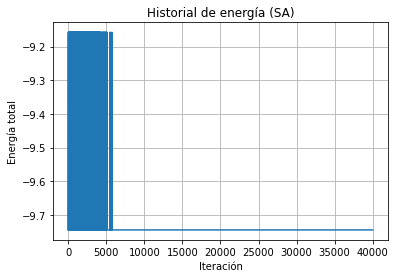

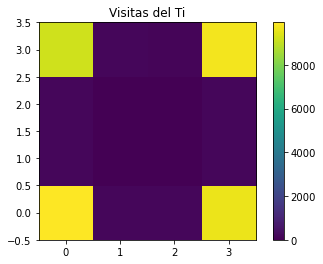

In [27]:
###############################################################
#   PARCIAL MARKOV – PUNTO 1
#   IMPLEMENTACIÓN FINAL CON ESPACIAMIENTO 2.8
#   SIN FUERZA BRUTA — SOLO SIMULATED ANNEALING
###############################################################

import math
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

LATTICE_SPACING = 2.8    # <--- ESPACIAMIENTO CORRECTO

# ---------------------------------------------------------
# PARÁMETROS MORSE (TABLA DEL ENUNCIADO)
# ---------------------------------------------------------
MORSE_PARAMS = {
    ('Fe', 'Fe'): {'D0': 0.7640, 'alpha': 1.5995, 'r0': 2.7361},
    ('Fe', 'R'):  {'D0': 0.6036, 'alpha': 1.6458, 'r0': 3.1880},
    ('R',  'R'):  {'D0': 0.3120, 'alpha': 0.9450, 'r0': 4.0920},
    ('Fe', 'Ti'): {'D0': 0.8162, 'alpha': 1.4480, 'r0': 2.9140},
    ('R',  'Ti'): {'D0': 0.4964, 'alpha': 1.4401, 'r0': 3.4309},
    ('Ti', 'Ti'): {'D0': 0.6540, 'alpha': 1.2118, 'r0': 3.3476},
}

def get_morse_params_any_order(a, b):
    if (a,b) in MORSE_PARAMS: return MORSE_PARAMS[(a,b)]
    if (b,a) in MORSE_PARAMS: return MORSE_PARAMS[(b,a)]
    raise KeyError(f"No params for ({a},{b})")

def morse_potential(r, D0, alpha, r0):
    x = math.exp(-alpha*(r-r0))
    return D0*(x*x - 2*x)

# ---------------------------------------------------------
#  RED 4×4 (R EN LAS ESQUINAS)
# ---------------------------------------------------------
def build_lattice():
    atom_types = []
    coords = []
    corners = {(1,1),(1,2),(2,1),(2,2)}
    for y in range(4):
        for x in range(4):
            coords.append((x*LATTICE_SPACING, y*LATTICE_SPACING))
            atom_types.append("R" if (x,y) in corners else "Fe")
    fe_indices = [i for i,t in enumerate(atom_types) if t=="Fe"]
    return atom_types, coords, fe_indices

# ---------------------------------------------------------
# MATRIZ DE DISTANCIAS
# ---------------------------------------------------------
def build_distance_matrix(coords):
    n = len(coords)
    D = np.zeros((n,n))
    for i in range(n):
        xi, yi = coords[i]
        for j in range(i+1,n):
            xj, yj = coords[j]
            r = math.hypot(xi-xj, yi-yj)
            D[i,j] = r
            D[j,i] = r
    return D

# ---------------------------------------------------------
# ENERGÍA LOCAL (PARA CALCULAR Δ)
# ---------------------------------------------------------
def local_site_energy(idx, types, dist_matrix):
    E = 0.0
    n = len(types)
    for j in range(n):
        if j == idx: 
            continue
        p = get_morse_params_any_order(types[idx], types[j])
        E += morse_potential(dist_matrix[idx,j], p['D0'], p['alpha'], p['r0'])
    return E

# ---------------------------------------------------------
#   SIMULATED ANNEALING (VERSIÓN FINAL)
# ---------------------------------------------------------
def simulated_annealing(
        atom_types_base,
        fe_indices,
        dist_matrix,
        n_iterations = 50000,
        T0 = 1.0,
        cooling_rate = 0.9996,
        seed = None):

    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    n = len(atom_types_base)
    
    # Estado inicial
    current_idx = random.choice(fe_indices)
    types = atom_types_base.copy()
    types[current_idx] = "Ti"

    # Energía total inicial
    E_current = 0.0
    for i in range(n):
        for j in range(i+1, n):
            p = get_morse_params_any_order(types[i], types[j])
            E_current += morse_potential(dist_matrix[i,j], p['D0'], p['alpha'], p['r0'])

    best_idx = current_idx
    best_E = E_current

    history = [E_current]
    trajectory = [current_idx]
    accepted = 0
    attempts = 0

    T = T0

    for step in range(n_iterations):

        proposal_idx = random.choice(fe_indices)
        if proposal_idx == current_idx:
            T *= cooling_rate
            history.append(E_current)
            trajectory.append(current_idx)
            continue

        attempts += 1

        Ei_before = local_site_energy(current_idx, types, dist_matrix)
        Ej_before = local_site_energy(proposal_idx, types, dist_matrix)

        # SWAP
        types_prop = types.copy()
        types_prop[current_idx]  = "Fe"
        types_prop[proposal_idx] = "Ti"

        Ei_after = local_site_energy(current_idx, types_prop, dist_matrix)
        Ej_after = local_site_energy(proposal_idx, types_prop, dist_matrix)

        delta = (Ei_after + Ej_after) - (Ei_before + Ej_before)

        accept_prob = math.exp(-delta/T) if delta > 0 else 1.0
        if random.random() < accept_prob:
            types = types_prop
            current_idx = proposal_idx
            E_current += delta
            accepted += 1
            if E_current < best_E:
                best_E = E_current
                best_idx = current_idx

        T *= cooling_rate
        history.append(E_current)
        trajectory.append(current_idx)

        if T < 1e-16:
            break

    return {
        "best_idx": best_idx,
        "best_E": best_E,
        "E_current": E_current,
        "history": history,
        "trajectory": trajectory,
        "accepted": accepted,
        "attempts": attempts,
        "acceptance_rate": accepted/attempts if attempts>0 else 0,
        "final_types": types,
        "seed": seed
    }

# ---------------------------------------------------------
# EJECUCIÓN PRINCIPAL (SA)
# ---------------------------------------------------------
def main():
    atom_types_base, coords, fe_indices = build_lattice()
    dist_matrix = build_distance_matrix(coords)

    sa = simulated_annealing(
        atom_types_base,
        fe_indices,
        dist_matrix,
        n_iterations=40000,
        T0=1.0,
        cooling_rate=0.9996,
        seed=2025
    )

    print("Índice resultante:", sa["best_idx"])
    print("Menor energía:", sa["best_E"])
    print("Tasa de aceptación:", sa["acceptance_rate"])

    # GRAFICAR HISTORIA
    plt.plot(sa["history"])
    plt.xlabel("Iteración")
    plt.ylabel("Energía total")
    plt.title("Historial de energía (SA)")
    plt.grid()
    plt.show()

    # HEATMAP DE VISITAS
    counts = Counter(sa["trajectory"])
    heat = np.zeros((4,4))
    for idx,(x,y) in enumerate(coords):
        gx = int(round(x/LATTICE_SPACING))
        gy = int(round(y/LATTICE_SPACING))
        heat[gy,gx] = counts.get(idx,0)

    plt.imshow(heat, origin='lower', cmap='viridis')
    plt.colorbar()
    plt.title("Visitas del Ti")
    plt.show()
    
    

if __name__ == "__main__":
    main()
